In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pre_df = pd.read_csv('../data/cleaned/cleaned_vessel_calls.csv')

In [4]:
# preprocess dataframe - duration and month
pre_df["arrivalDate"] = pd.to_datetime(pre_df["arrivalDate"])
pre_df["sailingDate"] = pd.to_datetime(pre_df["sailingDate"])
pre_df["duration"] = pd.to_datetime(pre_df["sailingDate"]) - pd.to_datetime(pre_df["arrivalDate"])
pre_df["month"] = pre_df["arrivalDate"].dt.month

In [5]:
pre_df['duration'] = pre_df['duration'] / pd.Timedelta(days=1)

In [6]:
# drop null values in df
pre_df = pre_df.dropna()

In [7]:
# preprocess data
# sort by imo number
pre_df.sort_values(by=["IMO", "arrivalDate"], inplace=True)
pre_df['next_place'] = pre_df.groupby('IMO')['place.placeName'].shift(-1)
pre_df['is_last_imo'] = pre_df['IMO'] != pre_df['IMO'].shift(-1)
pre_df = pre_df[~pre_df["is_last_imo"]]
pre_df = pre_df[pre_df["Event_Type"] != "ARRIVAL"]

In [8]:
pre_df.columns

Index(['arrivalDate', 'sailingDate', 'place.placeName', 'place.unlocode',
       'place.placeType', 'place.countryName', 'Timestamp', 'Event_Type',
       'IMO', 'vessel.vesselName', 'vessel.vesselType', 'duration', 'month',
       'next_place', 'is_last_imo'],
      dtype='object')

In [9]:
pre_df

,arrivalDate,sailingDate,place.placeName,place.unlocode,place.placeType,place.countryName,Timestamp,Event_Type,IMO,vessel.vesselName,vessel.vesselType,duration,month,next_place,is_last_imo
314761,2023-01-18 14:10:05,2023-01-26 04:05:00,Los Angeles,USLAX,Port,United States of America,2023-01-26T04:05:00,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),7.579803,1,Jiangyin,False
314763,2023-02-22 07:17:58,2023-02-23 18:56:16,Jiangyin,CNJGY,Port,People's Republic of China,2023-02-23T18:56:16,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),1.484931,2,Tianjin Xingang Port,False
314765,2023-03-02 16:00:39,2023-03-03 12:31:09,Tianjin Xingang Port,CNTXG,Port,People's Republic of China,2023-03-03T12:31:09,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),0.854514,3,Qianwan,False
314767,2023-03-04 21:02:13,2023-03-05 11:45:29,Qianwan,CNQAW,Sub Port,People's Republic of China,2023-03-05T11:45:29,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),0.613380,3,Meishan,False
314769,2023-03-06 23:30:18,2023-03-08 00:00:46,Meishan,CNMSN,Sub Port,People's Republic of China,2023-03-08T00:00:46,DEPARTURE,1026764,Max 08,Vessel Type (unspecified),1.021157,3,Nansha Port,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12569,2023-09-05 05:50:48,2023-09-06 02:46:03,Port Klang (Pelabuhan Klang),MYPKG,Port,Malaysia,2023-09-06T02:46:03,DEPARTURE,9951135,Asterios,fully cellular containership,0.871701,9,Chennai (ex Madras),False
12571,2023-09-10 16:43:35,2023-09-11 20:02:20,Chennai (ex Madras),INMAA,Port,India,2023-09-11T20:02:20,DEPARTURE,9951135,Asterios,fully cellular containership,1.138021,9,Chittagong (Chattogram),False
12573,2023-09-15 05:31:56,2023-09-17 05:28:29,Chittagong (Chattogram),BDCGP,Port,Bangladesh,2023-09-17T05:28:29,DEPARTURE,9951135,Asterios,fully cellular containership,1.997604,9,Laem Chabang,False
12575,2023-09-24 15:15:36,2023-09-25 08:23:38,Laem Chabang,THLCH,Port,Thailand,2023-09-25T08:23:38,DEPARTURE,9951135,Asterios,fully cellular containership,0.713912,9,Singapore,False


In [10]:
pre_df = pre_df.drop(columns=["is_last_imo", "Event_Type", "Timestamp", "vessel.vesselName", "IMO", "arrivalDate", "sailingDate"])
pre_df

,place.placeName,place.unlocode,place.placeType,place.countryName,vessel.vesselType,duration,month,next_place
314761,Los Angeles,USLAX,Port,United States of America,Vessel Type (unspecified),7.579803,1,Jiangyin
314763,Jiangyin,CNJGY,Port,People's Republic of China,Vessel Type (unspecified),1.484931,2,Tianjin Xingang Port
314765,Tianjin Xingang Port,CNTXG,Port,People's Republic of China,Vessel Type (unspecified),0.854514,3,Qianwan
314767,Qianwan,CNQAW,Sub Port,People's Republic of China,Vessel Type (unspecified),0.613380,3,Meishan
314769,Meishan,CNMSN,Sub Port,People's Republic of China,Vessel Type (unspecified),1.021157,3,Nansha Port
...,...,...,...,...,...,...,...,...
12569,Port Klang (Pelabuhan Klang),MYPKG,Port,Malaysia,fully cellular containership,0.871701,9,Chennai (ex Madras)
12571,Chennai (ex Madras),INMAA,Port,India,fully cellular containership,1.138021,9,Chittagong (Chattogram)
12573,Chittagong (Chattogram),BDCGP,Port,Bangladesh,fully cellular containership,1.997604,9,Laem Chabang
12575,Laem Chabang,THLCH,Port,Thailand,fully cellular containership,0.713912,9,Singapore


In [11]:
df = pre_df.rename(columns={'place.unlocode':'unlocode', 'place.placeName':'current_port','vessel.vesselType':'vesselType', 'place.placeType': 'placeType', 'place.countryName': 'countryName'})
df

,current_port,unlocode,placeType,countryName,vesselType,duration,month,next_place
314761,Los Angeles,USLAX,Port,United States of America,Vessel Type (unspecified),7.579803,1,Jiangyin
314763,Jiangyin,CNJGY,Port,People's Republic of China,Vessel Type (unspecified),1.484931,2,Tianjin Xingang Port
314765,Tianjin Xingang Port,CNTXG,Port,People's Republic of China,Vessel Type (unspecified),0.854514,3,Qianwan
314767,Qianwan,CNQAW,Sub Port,People's Republic of China,Vessel Type (unspecified),0.613380,3,Meishan
314769,Meishan,CNMSN,Sub Port,People's Republic of China,Vessel Type (unspecified),1.021157,3,Nansha Port
...,...,...,...,...,...,...,...,...
12569,Port Klang (Pelabuhan Klang),MYPKG,Port,Malaysia,fully cellular containership,0.871701,9,Chennai (ex Madras)
12571,Chennai (ex Madras),INMAA,Port,India,fully cellular containership,1.138021,9,Chittagong (Chattogram)
12573,Chittagong (Chattogram),BDCGP,Port,Bangladesh,fully cellular containership,1.997604,9,Laem Chabang
12575,Laem Chabang,THLCH,Port,Thailand,fully cellular containership,0.713912,9,Singapore


In [12]:
# data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170752 entries, 314761 to 12577
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   current_port  170752 non-null  object 
 1   unlocode      170752 non-null  object 
 2   placeType     170752 non-null  object 
 3   countryName   170752 non-null  object 
 4   vesselType    170752 non-null  object 
 5   duration      170752 non-null  float64
 6   month         170752 non-null  int32  
 7   next_place    170752 non-null  object 
dtypes: float64(1), int32(1), object(6)
memory usage: 11.1+ MB


In [13]:
# print out the stats related to port appearance
print(df['current_port'].value_counts().describe())

count    1762.000000
mean       96.908059
std       351.752004
min         1.000000
25%         3.000000
50%        11.000000
75%        54.000000
max      8980.000000
Name: count, dtype: float64


In [14]:
# Calculate frequency of each port for thresholding
port_counts = pd.concat([df['current_port'], df['next_place']]).value_counts()

# Define the threshold (assuming 500 based on your update)
threshold = port_counts.quantile(0.90)
print(threshold)

# Filter ports that meet the threshold
valid_ports_df = port_counts[port_counts >= threshold]
valid_ports = port_counts[port_counts >= threshold].index
# Keep only rows where both current and next ports are in valid_ports
filtered_df = df[(df['current_port'].isin(valid_ports)) & (df['next_place'].isin(valid_ports))]
filtered_df


434.0


,current_port,unlocode,placeType,countryName,vesselType,duration,month,next_place
314765,Tianjin Xingang Port,CNTXG,Port,People's Republic of China,Vessel Type (unspecified),0.854514,3,Qianwan
314767,Qianwan,CNQAW,Sub Port,People's Republic of China,Vessel Type (unspecified),0.613380,3,Meishan
314769,Meishan,CNMSN,Sub Port,People's Republic of China,Vessel Type (unspecified),1.021157,3,Nansha Port
314771,Nansha Port,CNNSA,Sub Port,People's Republic of China,Vessel Type (unspecified),0.419896,3,Shekou Port
314773,Shekou Port,CNSHK,Sub Port,People's Republic of China,Vessel Type (unspecified),0.475683,3,Singapore
...,...,...,...,...,...,...,...,...
12569,Port Klang (Pelabuhan Klang),MYPKG,Port,Malaysia,fully cellular containership,0.871701,9,Chennai (ex Madras)
12571,Chennai (ex Madras),INMAA,Port,India,fully cellular containership,1.138021,9,Chittagong (Chattogram)
12573,Chittagong (Chattogram),BDCGP,Port,Bangladesh,fully cellular containership,1.997604,9,Laem Chabang
12575,Laem Chabang,THLCH,Port,Thailand,fully cellular containership,0.713912,9,Singapore


In [15]:
# uniqueness check
print(len(valid_ports))
print(len(set(valid_ports)))

178
178


In [16]:
# value counts of filtered_df
vc_filtered_df = pd.concat([filtered_df['current_port'], filtered_df['next_place']]).value_counts()
vc_filtered_df

Singapore                14870
Shanghai                  5578
Busan New Port            5409
Beilun                    5304
Long Beach                5303
                         ...  
Elizabeth                  243
Tauranga                   239
Juneau                     238
Yanbu Commercial Port      234
Zhangjiagang               200
Name: count, Length: 178, dtype: int64

In [17]:
# Select a certain number of samples for each port
# Initialize an empty list to store the rows before creating the final DataFrame
rows_to_add = []

# Track how many times each port has been added
port_usage = {port: 0 for port in valid_ports}

# Shuffle the data to randomize the sampling
filtered_df = filtered_df.sample(frac=1, random_state=42)

for _, row in filtered_df.iterrows():
    current_port = row['current_port']
    next_port = row['next_place']
    # Check if both ports in the row can still be added
    if port_usage[current_port] < 100 and port_usage[next_port] < 100:
        rows_to_add.append(row)
        # Update the usage count for both ports
        port_usage[current_port] += 1
        port_usage[next_port] += 1

        # Stop adding if both have reached the limit
        if all(count >= 100 for count in port_usage.values()):
            break

# Create the final DataFrame from the list of rows
balanced_df = pd.DataFrame(rows_to_add)

# Reset index after all operations
balanced_df = balanced_df.reset_index(drop=True)

# Print value counts to confirm balancing
df_bal_counts = pd.concat([balanced_df['current_port'], balanced_df['next_place']]).value_counts()
df_bal_counts.describe()
balanced_df

,current_port,unlocode,placeType,countryName,vesselType,duration,month,next_place
0,Busan New Port,KRBNP,Sub Port,Republic of Korea,fully cellular containership,1.080972,2,Gwangyang
1,Yantian Port,CNYTN,Port,People's Republic of China,fully cellular containership,0.713854,9,Port Botany
2,Cartagena Port,COSPC,Port,Colombia,fully cellular containership,0.580937,3,Kingston
3,Valencia,ESVLC,Port,Spain,fully cellular containership,0.978831,6,Valencia
4,Yangshan,CNYSN,Sub Port,People's Republic of China,fully cellular containership,0.475579,1,Beilun
...,...,...,...,...,...,...,...,...
8415,Bayport,USBY6,Sub Port,United States of America,fully cellular containership,1.361447,5,Kingston
8416,Benicia,USBNC,Port,United States of America,product tanker,2.171273,9,Benicia
8417,Acajutla,SVAQJ,Port,El Salvador,fully cellular containership,0.946169,6,Balboa
8418,Mizushima,JPMIZ,Port,Japan,Combined chemical and oil tanker,1.081111,9,Jurong/Singapore


In [18]:
print(df_bal_counts.describe())
df_bal_counts.quantile(0.15)

count    178.000000
mean      94.606742
std       12.045224
min       34.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      101.000000
Name: count, dtype: float64


85.0

In [19]:
threshold = df_bal_counts.quantile(0.15)
# filter ports again to remove ports in balanced_df that are not above a certain threshold from df_bal_counts
valid_ports_bal_df = df_bal_counts[df_bal_counts >= threshold]
valid_ports_bal = df_bal_counts[df_bal_counts >= threshold].index
# Keep only rows where both current and next ports are in valid_ports
filtered_bal_df = balanced_df[(balanced_df['current_port'].isin(valid_ports_bal)) & (balanced_df['next_place'].isin(valid_ports_bal))]
filtered_bal_df
valid_ports_bal_df

Le Havre         101
Benicia          101
Fujairah         101
Mazatlan         101
Manila           101
                ... 
Bayport           86
Robert's Bank     85
National City     85
Lianyungang       85
Norfolk           85
Name: count, Length: 153, dtype: int64

In [20]:
df = filtered_bal_df

In [21]:
filtered_bal_df

,current_port,unlocode,placeType,countryName,vesselType,duration,month,next_place
0,Busan New Port,KRBNP,Sub Port,Republic of Korea,fully cellular containership,1.080972,2,Gwangyang
1,Yantian Port,CNYTN,Port,People's Republic of China,fully cellular containership,0.713854,9,Port Botany
3,Valencia,ESVLC,Port,Spain,fully cellular containership,0.978831,6,Valencia
4,Yangshan,CNYSN,Sub Port,People's Republic of China,fully cellular containership,0.475579,1,Beilun
5,"Nagoya, Aichi",JPNGO,Port,Japan,vehicle carrier,0.425035,4,Yokohama
...,...,...,...,...,...,...,...,...
8410,Chiwan Port,CNCWN,Sub Port,People's Republic of China,fully cellular containership,1.398275,12,Chittagong (Chattogram)
8412,Lianyungang,CNLYG,Port,People's Republic of China,bulk carrier,4.088021,3,Gunsan
8413,Da Chan Bay,CNDCB,Sub Port,People's Republic of China,fully cellular containership,1.206169,10,Chiwan Port
8414,El Segundo,USELS,Port,United States of America,product tanker,1.462257,9,El Segundo


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features
label_encoders = {}
for column in ['unlocode', 'placeType', 'countryName', 'vesselType']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

C:\Users\syeda\AppData\Local\Temp\ipykernel_31284\2702706092.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column].astype(str))
C:\Users\syeda\AppData\Local\Temp\ipykernel_31284\2702706092.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column].astype(str))
C:\Users\syeda\AppData\Local\Temp\ipykernel_31284\2702706092.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [23]:
# manually map everything to integers for unlocode
# Combine both columns to find all unique ports
all_ports = pd.concat([df['current_port'], df['next_place']])

# Create unique identifiers for each port
unique_ports = all_ports.unique()
port_to_id = {port: i for i, port in enumerate(unique_ports)}

df['encoded_current_port'] = df['current_port'].map(port_to_id)
df['encoded_next_place'] = df['next_place'].map(port_to_id)

# Print the first few rows of the DataFrame to verify the encoding
display(df.head())


C:\Users\syeda\AppData\Local\Temp\ipykernel_31284\1425588039.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_current_port'] = df['current_port'].map(port_to_id)
C:\Users\syeda\AppData\Local\Temp\ipykernel_31284\1425588039.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_next_place'] = df['next_place'].map(port_to_id)


,current_port,unlocode,placeType,countryName,vesselType,duration,month,next_place,encoded_current_port,encoded_next_place
0,Busan New Port,75,1,33,6,1.080972,2,Gwangyang,0,63
1,Yantian Port,36,0,29,6,0.713854,9,Port Botany,1,50
3,Valencia,45,0,37,6,0.978831,6,Valencia,2,2
4,Yangshan,34,1,29,6,0.475579,1,Beilun,3,10
5,"Nagoya, Aichi",67,0,17,15,0.425035,4,Yokohama,4,42


In [24]:
ports = df[['current_port', 'encoded_current_port', 'next_place', 'encoded_next_place']]
ports

,current_port,encoded_current_port,next_place,encoded_next_place
0,Busan New Port,0,Gwangyang,63
1,Yantian Port,1,Port Botany,50
3,Valencia,2,Valencia,2
4,Yangshan,3,Beilun,10
5,"Nagoya, Aichi",4,Yokohama,42
...,...,...,...,...
8410,Chiwan Port,89,Chittagong (Chattogram),108
8412,Lianyungang,77,Gunsan,88
8413,Da Chan Bay,95,Chiwan Port,89
8414,El Segundo,137,El Segundo,137


In [25]:
df = df.drop(columns=['current_port', 'next_place'])

In [26]:
# Prepare features and target variable
X = df.drop(['encoded_next_place'], axis=1)
y = df['encoded_next_place']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[0.83974359, 0.        , 0.9787234 , ..., 0.01890143, 0.63636364,
        0.36842105],
       [0.44230769, 0.        , 0.36170213, ..., 0.00434473, 1.        ,
        0.34210526],
       [0.02564103, 0.        , 0.        , ..., 0.0140156 , 0.81818182,
        0.98684211],
       ...,
       [0.80128205, 0.        , 0.89361702, ..., 0.00606502, 0.90909091,
        0.72368421],
       [0.3525641 , 0.        , 0.29787234, ..., 0.01740074, 0.63636364,
        0.96710526],
       [0.29487179, 0.        , 0.17021277, ..., 0.01030173, 0.54545455,
        0.73684211]])

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [30]:
from sklearn.metrics import accuracy_score
# Make predictions
y_pred = model.predict(X_test)
 
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3338192419825073

In [31]:
print('Training Accuracy : ', 
      accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ', 
      accuracy_score(y_test, 
                             model.predict(X_test))*100)

Training Accuracy :  43.677113702623906
Validation Accuracy :  33.38192419825073


In [32]:
print(y_test)
print(y_train)

5431    152
1902    110
5335     31
4752     74
142      15
       ... 
1738    149
5865     84
6017     85
6294     40
699      52
Name: encoded_next_place, Length: 1372, dtype: int64
7776     56
5169     14
2888    150
324      63
330      54
       ... 
4290    101
6053      2
6098     30
6319     18
937      79
Name: encoded_next_place, Length: 5488, dtype: int64


In [33]:
y_test

5431    152
1902    110
5335     31
4752     74
142      15
       ... 
1738    149
5865     84
6017     85
6294     40
699      52
Name: encoded_next_place, Length: 1372, dtype: int64

In [34]:
# Trying to use RandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the model
model = RandomForestClassifier(random_state=42)

# Setup the parameter grid
param_grid = {
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 10],
    'max_features': ['sqrt', 'log2', None]  # Corrected from 'auto' to 'sqrt'
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1,
                                   error_score='raise')  # Adding error_score='raise' to get clearer error messages

try:
    random_search.fit(X_train, y_train)
except Exception as e:
    print("Error during fitting:", e)


# Evaluate the best model found by RandomizedSearchCV
best_model = random_search.best_estimator_
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

print('Training Accuracy : ', accuracy_score(y_train, train_predictions) * 100)
print('Validation Accuracy : ', accuracy_score(y_test, test_predictions) * 100)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
print(random_search.best_estimator_)

NameError: name 'random_search' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": model.feature_importances_}
).sort_values("importance", ascending=False)


# Display
feature_importances_df

,feature,importance
4,duration,0.372759
5,month,0.218974
0,port_name,0.118452
6,encoded_current_unlocode,0.118320
2,countryName,0.098732
3,vesselType,0.063659
1,placeType,0.009103


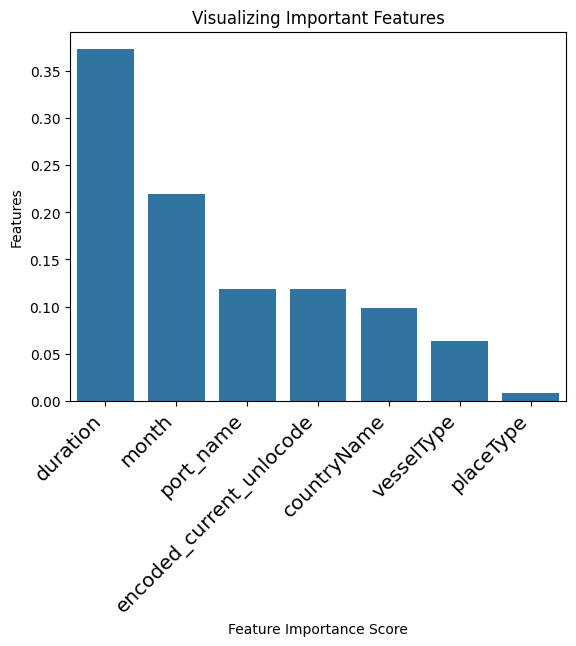

In [ ]:
# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()